In [1]:
%matplotlib inline
from LandBase import *

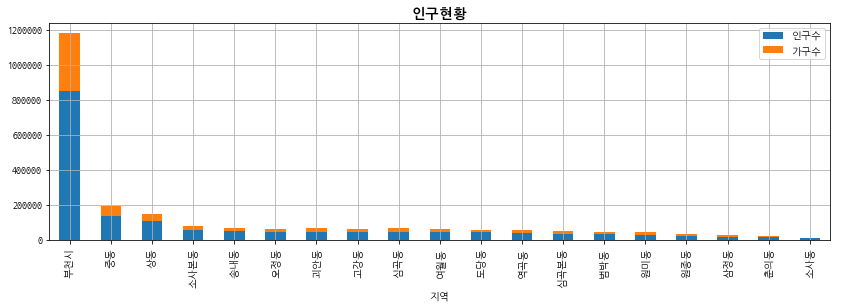

In [12]:
##############################
# 인구현황 - 인구수, 가구수
##############################
# DB Connection Open
con = get_db_connection()

# 데이터 조회해오기
sql = 'select '\
+'       yyyy as 년도,'\
+'       lawd_nm as 지역,'\
+'       sum(tot_population) as 인구수,'\
+'       sum(tot_household) as 가구수'\
+'  from ('\
+'        select yyyy, '\
+'               (select a.lawd_nm'\
+'                  from adm_law_map a'\
+'                 where a.admd_cd = p.admd_cd'\
+'                 order by a.from_dt desc'\
+'                 limit 1'\
+'               ) as lawd_nm,'\
+'               tot_population,'\
+'               tot_household'\
+'          from population_history p'\
+'         where admd_nm like \'경기도 부천시%\''\
+'           and tot_population > 0'\
+'           and yyyy = 2016'\
+'       ) s'\
+' group by yyyy, lawd_nm'
df = pd.read_sql(sql, con=con)
#df = df.pivot(index='지역', columns='년도', values='인구수')
#df = df.groupby(['지역','년도'])[['인구수','가구수']].sum()
df = df.groupby(['지역'])[['인구수','가구수']].sum()
df.sort_values(by='인구수', ascending=0, inplace=True)
df.plot(kind='bar', figsize=(14,4))
plt.title('인구현황', fontsize=14, fontweight='bold')

# DB Connection Close
disconnect_db(con)

#plt.legend(bbox_to_anchor=(0.5, -0.3), loc='upper center', ncol=10)

In [60]:
##############################
# 인구현황 - 인구수, 가구수, 65세 이상 비율
##############################
# DB Connection Open
con = get_db_connection()

# 데이터 조회해오기
sql = 'select '\
+'       yyyy as 년도,'\
+'       lawd_nm as 지역,'\
+'       sum(tot_population) as 인구수,'\
+'       sum(over65) as 65세이상,'\
+'       sum(tot_household) as 세대수,'\
+'       round(sum(tot_population)/sum(tot_household), 2) as 세대당인구수,'\
+'       concat(round(sum(over65)/sum(tot_population)*100), \'%\') as 65세이상비율'\
+'  from ('\
+'        select yyyy, '\
+'               (select sum('\
+'                       case when substr(term5, 1, 2) between \'65\' and \'95\' or term5 = \'100+\' '\
+'                       then tot_population'\
+'                       end)'\
+'                  from population_5term t'\
+'                 where t.admd_cd = p.admd_cd'\
+'                   and t.yyyy = p.yyyy'\
+'               ) as over65,'\
+'               (select a.lawd_nm'\
+'                  from adm_law_map a'\
+'                 where a.admd_cd = p.admd_cd'\
+'                 order by a.from_dt desc'\
+'                 limit 1'\
+'               ) as lawd_nm,'\
+'               tot_population,'\
+'               tot_household,'\
+'               cnt_per_household'\
+'          from population_history p'\
+'         where admd_nm like \'경기도 부천시%\' '\
+'           and tot_population > 0'\
+'           and yyyy = 2016'\
+'       ) p'\
+' group by yyyy, lawd_nm'\
+' order by 3 desc'
df = pd.read_sql(sql, con=con)
display('지역인구상세')
display(df)

# DB Connection Close
disconnect_db(con)


'지역인구상세'

,년도,지역,인구수,65세이상,세대수,세대당인구수,65세이상비율
0,2016,부천시,851380.0,NaN,331797.0,2.57,None
1,2016,중동,140071.0,11719.0,52178.0,2.68,8%
2,2016,상동,112047.0,7753.0,38150.0,2.94,7%
3,2016,소사본동,58044.0,6837.0,22408.0,2.59,12%
4,2016,송내동,52230.0,5387.0,19492.0,2.68,10%
5,2016,오정동,48092.0,4572.0,18143.0,2.65,10%
6,2016,괴안동,47862.0,6076.0,19493.0,2.46,13%
7,2016,고강동,47085.0,5668.0,19125.0,2.46,12%
8,2016,심곡동,46394.0,5123.0,23267.0,1.99,11%
9,2016,여월동,44495.0,4670.0,17069.0,2.61,10%


10세미만      10대      20대      30대       40대      50대    60대이상
lawd_nm   yyyy                                                                
인천광역시 강화군 2012   3888.0   6256.0   6163.0   6481.0    9163.0  12522.0  22279.0
          2013   3757.0   5965.0   5972.0   6208.0    9169.0  12644.0  23020.0
          2014   3650.0   5728.0   6015.0   6010.0    8987.0  12757.0  23971.0
          2015   3685.0   5442.0   5990.0   5936.0    8658.0  12852.0  25104.0
          2016   3687.0   5267.0   5964.0   5760.0    8562.0  12730.0  26040.0
인천광역시 계양구 2012  31472.0  48448.0  50835.0  55435.0   66366.0  53750.0  35896.0
          2013  30874.0  45557.0  51676.0  54730.0   65483.0  57370.0  38116.0
          2014  29629.0  42229.0  51683.0  52109.0   63338.0  59944.0  40606.0
          2015  28615.0  38671.0  51511.0  49690.0   60439.0  61682.0  43724.0
          2016  27307.0  36013.0  51271.0  47687.0   57978.0  63037.0  46991.0
인천광역시 남구  2012  34206.0  46014.0  58330.0  69489.0   69170.0  67390.0  69901.0
          2013  33375.0  43667.0  56641.0  67648.0   68944.0  68632.0  72423.0
          2014  32721.0  41379.0  56156.0  64891.0   68203.0  69310.0  75645.0
          2015  32104.0  39042.0  55586.0  62608.0   66983.0  68960.0  79610.0
          2016  33558.0  38005.0  57750.0  64268.0   68356.0  70469.0  84697.0
인천광역시 남동구 2012  51121.0  64834.0  69262.0  87430.0   91150.0  77224.0  62576.0
          2013  50568.0  62697.0  69152.0  86264.0   91973.0  80305.0  66062.0
          2014  50920.0  60496.0  70431.0  85431.0   92670.0  83749.0  70959.0
          2015  53095.0  58798.0  72399.0  87321.0   94003.0  87523.0  78256.0
          2016  51920.0  56284.0  72511.0  85207.0   93016.0  88624.0  83420.0
인천광역시 동구  2012   6954.0   7887.0   8942.0  12968.0   11986.0  12412.0  15571.0
          2013   6669.0   7430.0   8478.0  12361.0   11896.0  12326.0  15933.0
          2014   6377.0   7125.0   8183.0  11701.0   11808.0  12231.0  16553.0
          2015   6187.0   6810.0   7798.0  10973.0   11610.0  11944.0  17249.0
          2016   5893.0   6396.0   7590.0  10367.0   11392.0  11531.0  17845.0
인천광역시 부평구 2012  49542.0  71792.0  79912.0  92386.0  101421.0  89082.0  74912.0
          2013  48130.0  67665.0  80046.0  90632.0  100090.0  92122.0  78300.0
          2014  47826.0  63601.0  80771.0  89106.0   97984.0  94914.0  82790.0
          2015  47274.0  59656.0  81036.0  87657.0   95362.0  96291.0  88568.0
          2016  46005.0  55748.0  80611.0  85169.0   92572.0  96724.0  92887.0
인천광역시 서구  2012  53697.0  65799.0  60894.0  83285.0   90699.0  66518.0  48995.0
          2013  55709.0  65429.0  63606.0  85880.0   94262.0  72121.0  53028.0
          2014  55836.0  63863.0  65393.0  84739.0   95187.0  76536.0  57132.0
          2015  55751.0  61736.0  66550.0  83675.0   94952.0  79703.0  62239.0
          2016  55283.0  60103.0  67800.0  82753.0   95036.0  82529.0  67229.0
인천광역시 연수구 2012  27796.0  44437.0  42342.0  43668.0   58274.0  45281.0  30791.0
          2013  28857.0  43259.0  43617.0  44170.0   58975.0  48588.0  32839.0
          2014  30611.0  42646.0  45005.0  45537.0   59831.0  51659.0  35414.0
          2015  32110.0  41614.0  45942.0  46355.0   60612.0  53924.0  38495.0
          2016  33282.0  41011.0  47394.0  47915.0   61498.0  55539.0  41988.0
인천광역시 옹진군 2012   1392.0   1419.0   2586.0   2535.0    2966.0   3814.0   5327.0
          2013   1315.0   1437.0   2723.0   2582.0    3043.0   4090.0   5508.0
          2014   1267.0   1392.0   2830.0   2466.0    2938.0   4116.0   5694.0
          2015   1268.0   1339.0   2937.0   2339.0    2834.0   4150.0   6095.0
          2016   1242.0   1357.0   2939.0   2407.0    2777.0   4168.0   6461.0
인천광역시 중구  2012   9419.0  10360.0  10912.0  17414.0   17091.0  15463.0  17989.0
          2013  10754.0  11083.0  11658.0  19099.0   19087.0  16623.0  19470.0
          2014  11319.0  11409.0  11924.0  19270.0   20124.0  17084.0  20799.0
          2015  11669.0  11422.0  12364.0  19344.0   20652.0  17090.

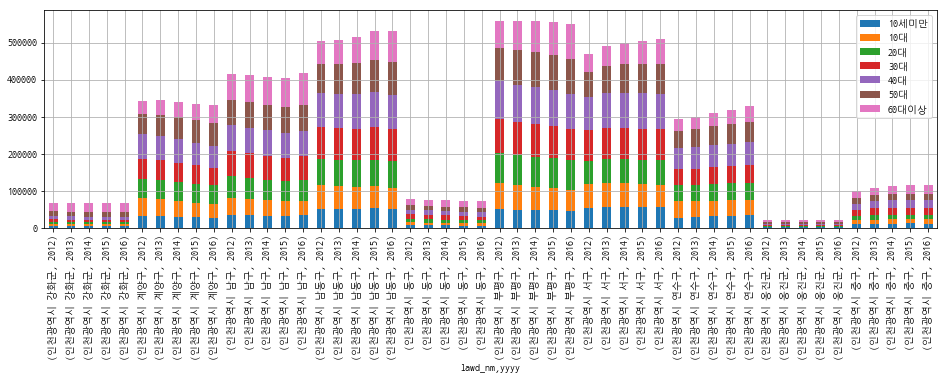

In [40]:
##############################
# 인구현황 - 세대별 인구 비중
##############################
# DB Connection Open
con = get_db_connection()

# 데이터 조회해오기
sql = 'select lawd_nm,'\
+'        yyyy,'\
+'        sum(case generation when \'10세미만\' then tot_population end) as 10세미만,'\
+'        sum(case generation when \'10대\' then tot_population end) as 10대,'\
+'        sum(case generation when \'20대\' then tot_population end) as 20대,'\
+'        sum(case generation when \'30대\' then tot_population end) as 30대,'\
+'        sum(case generation when \'40대\' then tot_population end) as 40대,'\
+'        sum(case generation when \'50대\' then tot_population end) as 50대,'\
+'        sum(case generation when \'60대이상\' then tot_population end) as 60대이상'\
+'        /*sum(tot_population) as 계*/ '\
+'  from ('\
+'        select yyyy,'\
+'                admd_cd,'\
+'                case substr(admd_cd, 1, 2) '\
+'                when \'11\' then concat(\'서울특별시 \', trim(admd_nm))'\
+'                when \'28\' then concat(\'인천광역시 \', trim(admd_nm))'\
+'                when \'41\' then concat(\'경기도 \', trim(admd_nm))'\
+'                end as lawd_nm,'\
+'                case term5 '\
+'                when \'0 - 4세\' then \'10세미만\''\
+'                when \'5 - 9세\' then \'10세미만\''\
+'                when \'10 - 14세\' then \'10대\''\
+'                when \'15 - 19세\' then \'10대\''\
+'                when \'20 - 24세\' then \'20대\''\
+'                when \'25 - 29세\' then \'20대\''\
+'                when \'30 - 34세\' then \'30대\''\
+'                when \'35 - 39세\' then \'30대\''\
+'                when \'40 - 44세\' then \'40대\''\
+'                when \'45 - 49세\' then \'40대\''\
+'                when \'50 - 54세\' then \'50대\''\
+'                when \'55 - 59세\' then \'50대\''\
+'                else case when term5 != \'계\' then \'60대이상\' end'\
+'                end as generation,'\
+'                tot_population'\
+'        from population_5term t'\
+'        where char_length(admd_cd) = 5'\
+'  ) s '\
+' where (lawd_nm like \'%인천%\' '\
+'or lawd_nm like \'%인천%\') '\
+'   and yyyy in (2012, 2013, 2014, 2015, 2016) '\
+' group by lawd_nm, yyyy '\
+' /*having sum(tot_population) > 500000*/'
df = pd.read_sql(sql, con=con, index_col=['lawd_nm', 'yyyy'])
#df.sort_values(by='40대', ascending=0, inplace=True)
display(df)
df.plot(kind='bar', stacked=True, figsize=(16,4))
#plt.title('세대현황', fontsize=14, fontweight='bold')

# DB Connection Close
disconnect_db(con)


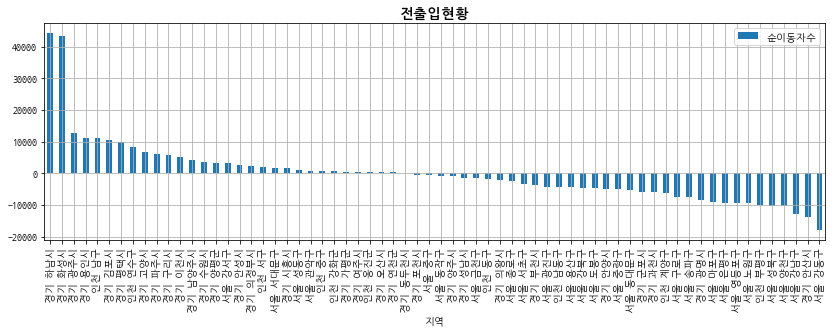

In [51]:
##############################
# 인구현황 - 전체 전입/전출
##############################
# DB Connection Open
con = get_db_connection()

# 데이터 조회해오기
sql = 'select o.transfer_nm as 지역, o.yyyy as 년도, o.out_cnt as 전출자수, i.in_cnt as 전입자수, i.in_cnt - o.out_cnt as 순이동자수'\
+'  from ('\
+'        select transfer_nm, yyyy, sum(person_cnt) as out_cnt'\
+'          from population_move'\
+'         where transfer_nm not in (\'전국\',\'서울\',\'경기\',\'인천\')'\
+'           and transference_nm not in (\'전국\',\'서울\',\'경기\',\'인천\')'\
+'           and substr(transfer_nm, 1, 2) in (\'서울\',\'경기\',\'인천\')'\
+'         group by transfer_nm, yyyy'\
+'       ) o'\
+'  join ('\
+'        select transference_nm, yyyy, sum(person_cnt) as in_cnt'\
+'          from population_move'\
+'         where transfer_nm not in (\'전국\',\'서울\',\'경기\',\'인천\')'\
+'           and transference_nm not in (\'전국\',\'서울\',\'경기\',\'인천\')'\
+'           and substr(transference_nm, 1, 2) in (\'서울\',\'경기\',\'인천\')'\
+'         group by transference_nm, yyyy'\
+'       ) i'\
+'  on o.transfer_nm = i.transference_nm'\
+'  and o.yyyy = i.yyyy'\
+' where o.yyyy = 2016'
df = pd.read_sql(sql, con=con)
df = df.groupby(['지역'])[['순이동자수']].sum()
df.sort_values(by='순이동자수', ascending=0, inplace=True)
df.plot(kind='bar', figsize=(14,4))
plt.title('전출입현황', fontsize=14, fontweight='bold')

# DB Connection Close
disconnect_db(con)

#plt.legend(bbox_to_anchor=(0.5, -0.3), loc='upper center', ncol=10)

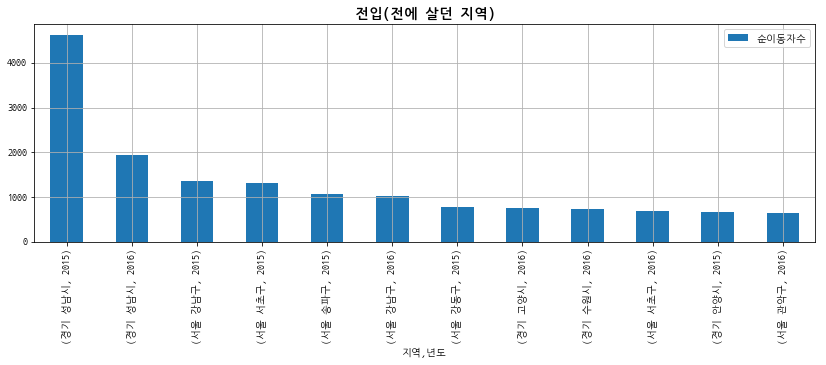

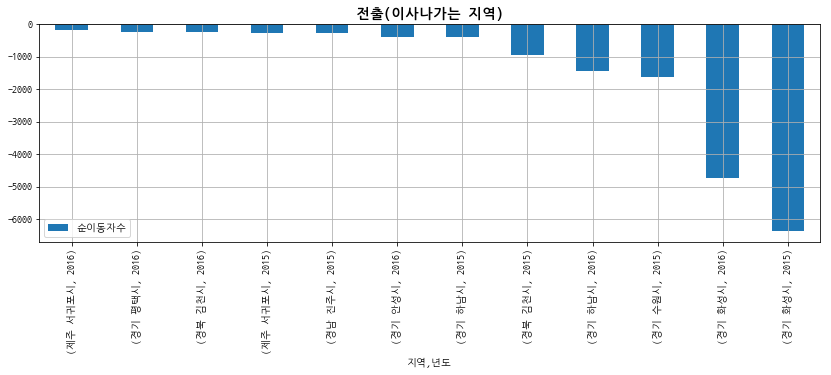

In [77]:
##############################
# 인구현황 - 지역선택 전입/전출
##############################
# DB Connection Open
con = get_db_connection()

# 데이터 조회해오기
sql = ''\
+'select yyyy as 년도, nm as 지역, sum(out_cnt) as 전출자수, sum(in_cnt) as 전입자수, sum(in_cnt) - sum(out_cnt) as 순이동자수'\
+'  from ('\
+'        select yyyy, transference_nm as nm, sum(person_cnt) as out_cnt, 0 as in_cnt'\
+'          from population_move'\
+'         where char_length(trim(transfer_nm)) != 2'\
+'           and char_length(trim(transference_nm)) != 2'\
+'           and substr(transfer_nm, 1, 2) in (\'서울\',\'경기\',\'인천\')'\
+'           and transfer_nm like \'경기%용인%\''\
+'         group by transference_nm, yyyy'\
+'        union all'\
+'        select yyyy, transfer_nm as nm, 0 as out_cnt, sum(person_cnt) as in_cnt'\
+'          from population_move'\
+'         where char_length(trim(transfer_nm)) != 2'\
+'           and char_length(trim(transference_nm)) != 2'\
+'           and substr(transference_nm, 1, 2) in (\'서울\',\'경기\',\'인천\')'\
+'           and transference_nm like \'경기%용인%\''\
+'         group by transfer_nm, yyyy'\
+'       ) s'\
+' where yyyy in (2015, 2016)'\
+' group by yyyy, nm'\
+' order by yyyy, 순이동자수'\
+''
df = pd.read_sql(sql, con=con)
df = df.groupby(['지역','년도'])[['순이동자수']].sum()
df.sort_values(by='순이동자수', ascending=0, inplace=True)
df.head(12).plot(kind='bar', figsize=(14,4))
plt.title('전입(전에 살던 지역)', fontsize=14, fontweight='bold')
df.tail(12).plot(kind='bar', figsize=(14,4))
plt.title('전출(이사나가는 지역)', fontsize=14, fontweight='bold')

# DB Connection Close
disconnect_db(con)
